In [15]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.decomposition import PCA

#sale데이터 로딩
data = pd.read_csv("wholesale.csv")
data.shape

print(data.head(5))

#차원축소(PCA) 
pca = PCA(n_components=2)
result = pca.fit_transform(data)

stscaler = StandardScaler().fit(result)
result = stscaler.transform(result)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [25]:
print(result.shape)
result

(440, 2)


array([[ 5.06623851e-02,  1.31615053e-01],
       [-3.45022873e-01,  3.35566736e-01],
       [-3.77382855e-01,  2.14064858e-01],
       [ 7.71870856e-02, -5.21291101e-01],
       [ 8.30678865e-01, -1.79280353e-01],
       [-2.15577605e-01, -7.96795411e-02],
       [-5.57696635e-02, -1.67100729e-01],
       [-3.48746718e-01,  1.18663547e-01],
       [-5.23137216e-01, -1.83114067e-01],
       [-3.75951548e-01,  1.11903068e+00],
       [-6.21554014e-01,  4.74092290e-01],
       [ 2.83651241e-03, -5.01210014e-01],
       [ 1.55412895e+00,  3.81125914e-01],
       [ 7.32373554e-01,  4.90855315e-01],
       [ 9.86742671e-01,  3.77030078e-01],
       [-2.33641193e-01, -5.05857196e-01],
       [-8.25341946e-01,  5.46560384e-01],
       [-4.96248078e-01, -3.05538542e-01],
       [ 5.16257493e-01,  1.04155150e-01],
       [-3.78905236e-01, -1.87265732e-02],
       [ 3.73660891e-01, -3.31113031e-01],
       [-5.64661144e-01, -6.09939662e-01],
       [ 1.50417471e+00, -5.75829519e-01],
       [ 1.

Populating the interactive namespace from numpy and matplotlib


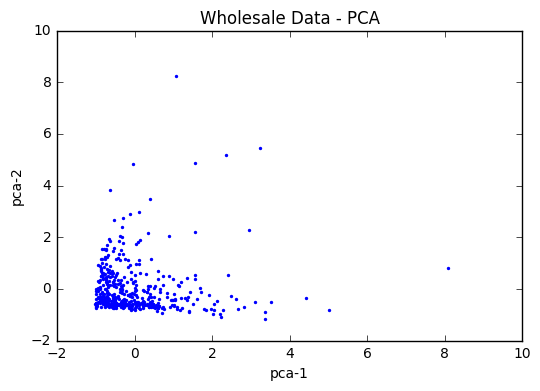

In [5]:
import matplotlib.pyplot as plt
%pylab inline

plt.scatter(result[:,0], result[:,1] , s = 2 , color = 'blue')
plt.xlabel("pca-1")
plt.ylabel("pca-2")
plt.title("Wholesale Data - PCA")
plt.savefig("pca_wholesale.png", format = "PNG")

In [19]:
#밀도기반 군집분석(DBSCAN) 
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(result)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [9]:
#색상테이블을 만드는 작업
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
colors

array([[0.61960787, 0.00392157, 0.25882354, 1.        ],
       [0.36862746, 0.30980393, 0.63529414, 1.        ]])

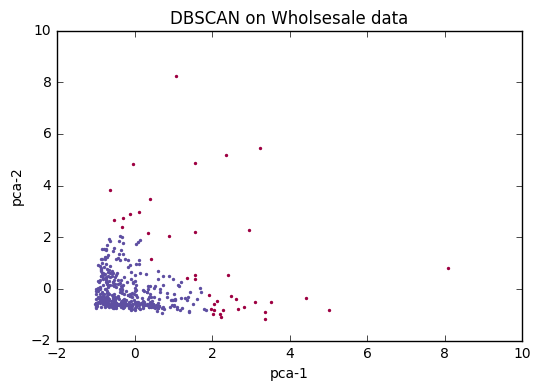

In [10]:
#군집과 노이즈를 색깔로 구분한다. 
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = result[class_member_mask & core_samples]
    plt.scatter(xy[:,0],xy[:,1], color = color , s = 2)
    
    xy2 = result[class_member_mask & ~core_samples]
    plt.scatter(xy2[:,0],xy2[:,1], color = color , s = 2)
    
plt.title("DBSCAN on Wholsesale data")
plt.xlabel("pca-1")
plt.ylabel("pca-2")
plt.savefig("dbscan_wholesale_pca.png", format = "PNG")